#chap171Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
n = 7
m = 10
objp = np.zeros((n*m,3), np.float32)
objp[:,:2] = np.mgrid[0:n,0:m].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\iphone\*.png')

In [5]:
len(images)

21

In [6]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (n,m),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (n,m), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(3000)
cv2.destroyAllWindows()

#Calibration

In [7]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray. shape[::-1],None,None)

In [8]:
len(imgpoints)

21

In [9]:
len(objpoints)

21

In [10]:
objpoints[20].shape

(70, 3)

In [11]:
np.transpose(objpoints[20])

array([[0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1.,
        2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3.,
        4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5.,
        6., 0., 1., 2., 3., 4., 5., 6., 0., 1., 2., 3., 4., 5., 6., 0.,
        1., 2., 3., 4., 5., 6.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
        4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6.,
        6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 9.,
        9., 9., 9., 9., 9., 9.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
ret

0.6764049613840599

In [13]:
mtx

array([[923.64587715,   0.        , 421.21314957],
       [  0.        , 920.66793219, 406.67688213],
       [  0.        ,   0.        ,   1.        ]])

In [14]:
dist

array([[-4.06677446e-01,  4.48414462e+00, -6.59768043e-05,
         1.01092441e-03, -1.79392604e+01]])

In [15]:
rvecs

[array([[-0.26383487],
        [ 0.27643816],
        [ 1.55159819]]),
 array([[-0.3953788 ],
        [ 0.15697427],
        [ 0.6446827 ]]),
 array([[-0.40577868],
        [-0.16213018],
        [-0.66674097]]),
 array([[-0.20328019],
        [-0.22250113],
        [-1.55126011]]),
 array([[-0.12656985],
        [-0.41320719],
        [-2.47469148]]),
 array([[-0.13360411],
        [ 0.59523097],
        [ 2.83319066]]),
 array([[ 0.05896761],
        [-0.56689644],
        [-2.99221225]]),
 array([[-0.05129289],
        [ 0.23696426],
        [ 1.52637398]]),
 array([[-0.35410221],
        [ 0.37043625],
        [ 1.48330305]]),
 array([[-0.00948389],
        [-0.19325411],
        [ 1.55812433]]),
 array([[0.01755503],
        [0.24637668],
        [1.41745686]]),
 array([[-0.36914167],
        [ 0.05462819],
        [ 1.09275329]]),
 array([[ 0.15003069],
        [-0.25679254],
        [ 0.02504066]]),
 array([[-0.15472005],
        [-0.18723556],
        [ 0.45447273]]),
 array([[

In [16]:
len(rvecs)

21

In [17]:
tvecs

[array([[ 3.41808138],
        [-0.7326882 ],
        [28.64653539]]),
 array([[-1.95903693],
        [-1.93883865],
        [39.07184936]]),
 array([[-6.04192432],
        [ 1.59762058],
        [27.84040741]]),
 array([[-7.14670832],
        [ 7.79237633],
        [34.88719521]]),
 array([[-2.36303506],
        [10.11169538],
        [28.63253503]]),
 array([[ 2.42999723],
        [ 9.65454561],
        [35.31654827]]),
 array([[ 0.3420415 ],
        [ 8.04223726],
        [26.52334562]]),
 array([[ 3.03994285],
        [-0.18629966],
        [27.64109633]]),
 array([[ 3.14651084],
        [ 0.41548372],
        [32.64653961]]),
 array([[ 3.16185426],
        [ 0.12544169],
        [30.9761264 ]]),
 array([[ 0.10077952],
        [ 1.59458817],
        [32.89751749]]),
 array([[ 2.29949554],
        [-1.38020633],
        [35.6251167 ]]),
 array([[-1.01378537],
        [-5.26454427],
        [23.47442009]]),
 array([[ 1.98249076],
        [-7.27228611],
        [26.324001  ]]),
 array

In [18]:
len(tvecs)

21

In [19]:
img = cv2.imread('.\iphone\sIMG_3538.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

#Using cv2.undistort()

In [20]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

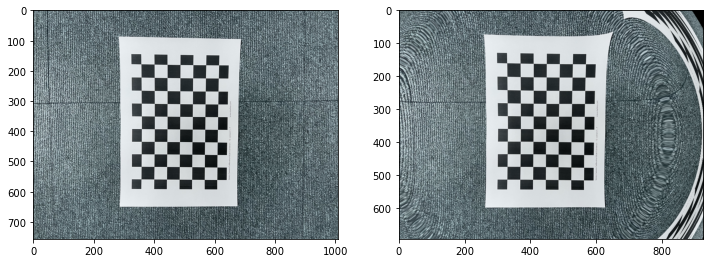

In [21]:
plt.figure(figsize = (12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

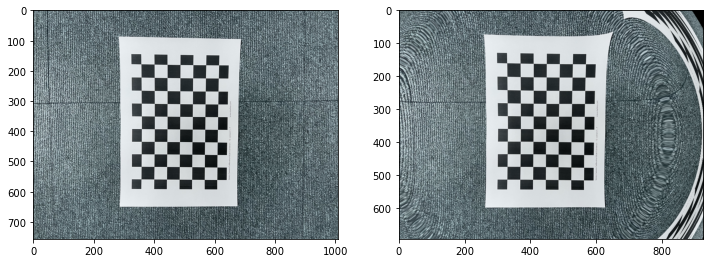

In [22]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(dst)
plt.show()

#Using remapping

In [23]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

In [24]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

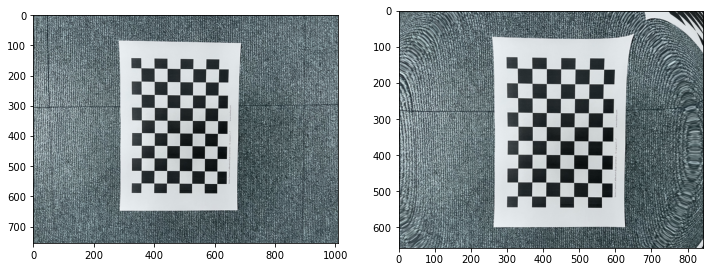

In [25]:
plt.figure(figsize = (12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [26]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print( "total error: ", mean_error/len(objpoints))

NameError: name 'tot_error' is not defined

#1.7.2 Pose Estimation

In [27]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [28]:
def drawBox(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [29]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((n*m,3), np.float32)
objp[:,:2] = np.mgrid[0:n,0:m].T.reshape(-1,2)

In [30]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

In [31]:
axisBox = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],[0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

In [32]:
for fname in glob.glob('.\iphone\*.png'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n,m),None)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)
        img = draw(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)
cv2.destroyAllWindows()

<ipython-input-27-2943238ddec0>:3: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
<ipython-input-27-2943238ddec0>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
<ipython-input-27-2943238ddec0>:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)


In [33]:
for fname in glob.glob('.\iphone\*.png'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (n,m),None)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axisBox, rvecs, tvecs, mtx, dist)
        img = drawBox(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)
cv2.destroyAllWindows()

In [34]:
 ret,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

In [35]:
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [0., 6., 0.],
       [1., 6., 0.],
       [2., 6., 0.],
       [3., 6., 0.],
       [4., 6., 0.],
       [5., 6

In [36]:
corners2

array([[[357.65994, 178.76949]],

       [[401.3985 , 179.56886]],

       [[444.26553, 180.45358]],

       [[486.9536 , 181.0809 ]],

       [[529.54047, 181.51468]],

       [[572.185  , 181.76701]],

       [[614.59406, 182.37553]],

       [[358.3732 , 222.48624]],

       [[401.5769 , 223.43874]],

       [[444.31573, 224.20432]],

       [[486.6133 , 224.63019]],

       [[528.88446, 225.2017 ]],

       [[571.3093 , 225.44476]],

       [[613.551  , 225.54564]],

       [[358.55298, 265.82205]],

       [[401.71143, 266.5726 ]],

       [[444.3409 , 267.44266]],

       [[486.4926 , 267.90768]],

       [[528.46967, 268.41534]],

       [[570.4415 , 268.5562 ]],

       [[612.60114, 268.71774]],

       [[358.8433 , 308.54373]],

       [[401.93152, 309.43872]],

       [[444.3462 , 309.834  ]],

       [[486.40073, 310.46832]],

       [[528.0411 , 310.72507]],

       [[569.74457, 311.1747 ]],

       [[611.86615, 311.42276]],

       [[359.2974 , 350.66858]],

       [[402.2

In [37]:
len(corners2)

70

In [38]:
corners2[69]

array([[608.5582, 560.5888]], dtype=float32)

internal parameter

In [39]:
mtx

array([[923.64587715,   0.        , 421.21314957],
       [  0.        , 920.66793219, 406.67688213],
       [  0.        ,   0.        ,   1.        ]])

In [40]:
dist

array([[-4.06677446e-01,  4.48414462e+00, -6.59768043e-05,
         1.01092441e-03, -1.79392604e+01]])

In [41]:
tvecs

array([[-1.45192144],
       [-5.30768932],
       [21.39477781]])